# Support Vector Machines (Support Vector Classifier) method for wine type prediction.

**Import wine dataset from scikit learn dataset and other libraries needed.**

In [1]:
from sklearn.datasets import load_wine

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
win = load_wine()

**The detailed information of the dataset.**

In [4]:
print(win['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

**Show the target data. There are 3 classes of wine (0, 1, and 2).**

In [6]:
win['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

**Create a new dataframe of the wine data, and using its feature names as the column names.**

In [123]:
win_df = pd.DataFrame(win['data'], columns=win['feature_names'])

In [124]:
win_df['wine_class'] = win['target']

In [125]:
win_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


**Dataset information shows that it contains none of null values. This heatmap below is just to double-check.**

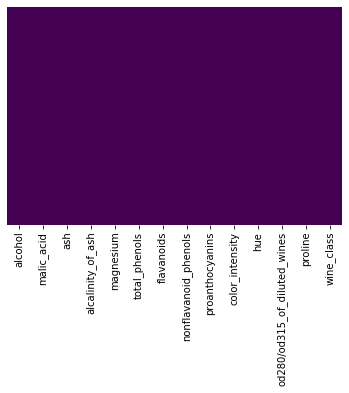

In [126]:
sns.heatmap(win_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**Create a pairplot to see the relationship of one column (feature) to another as to explore the dataset. It is also used to show how the distribution of the data is in the dataset, and also by using .corr() to see the correlations.**

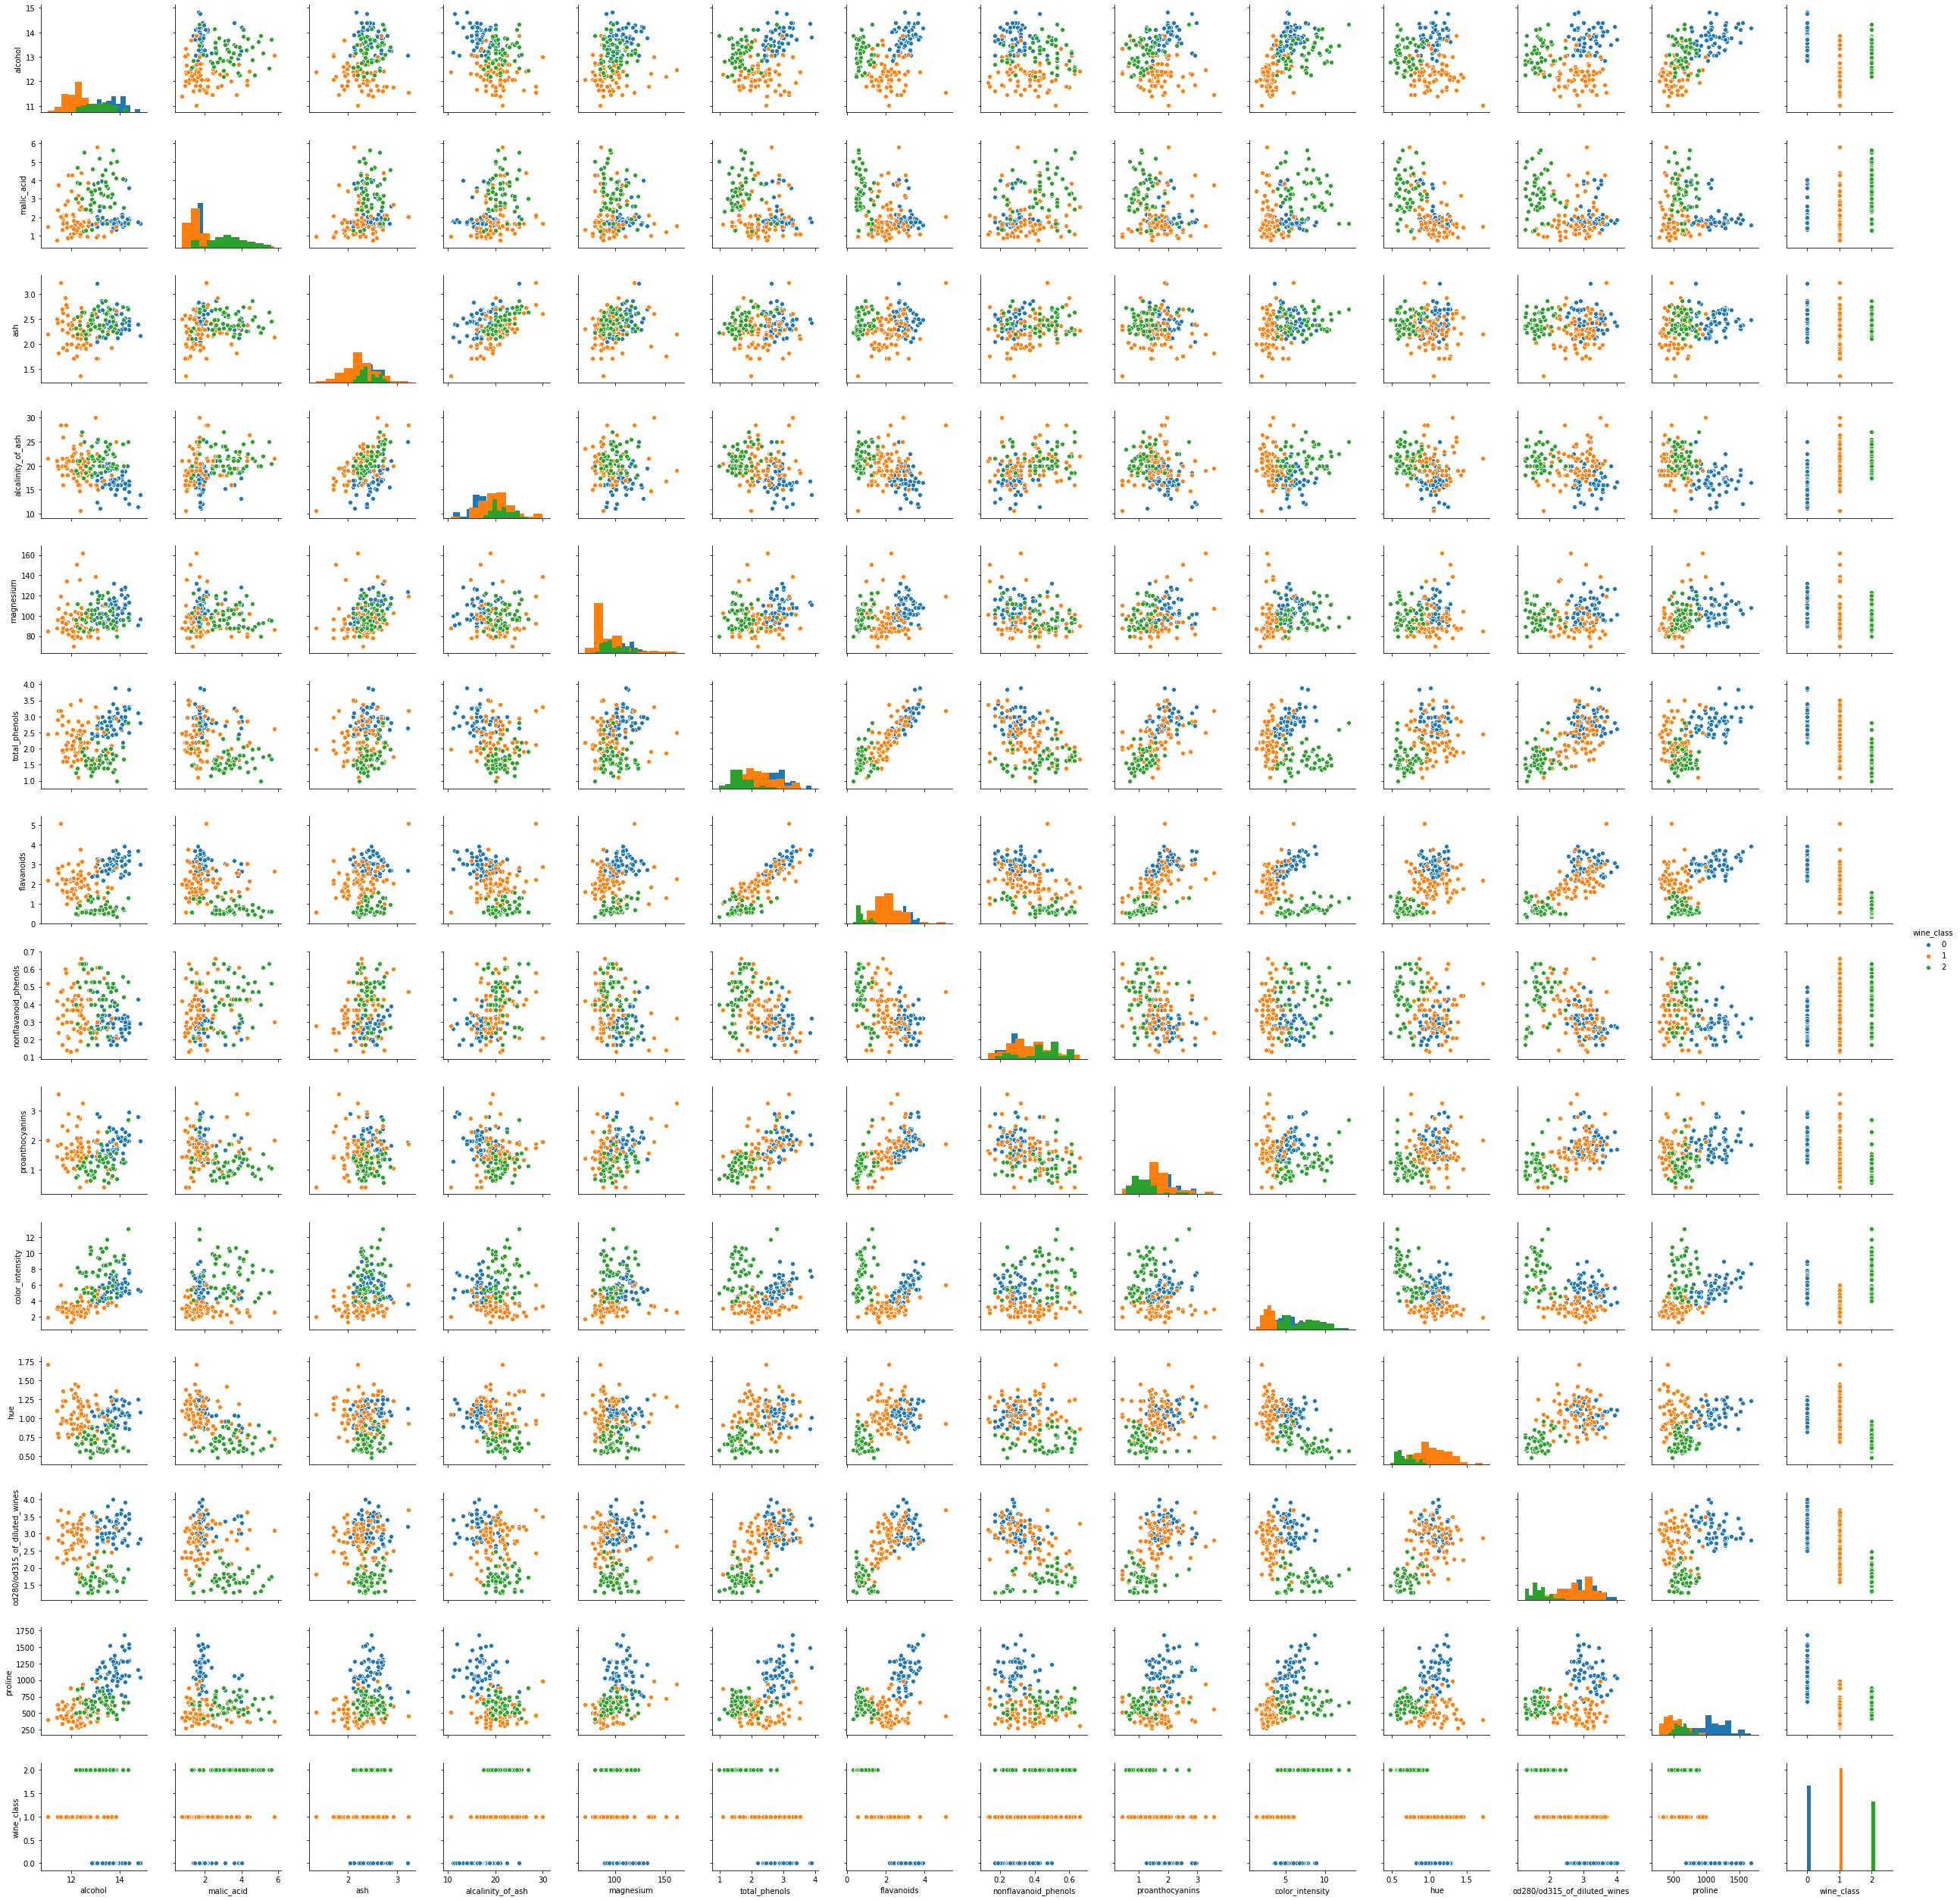

In [22]:
sns.pairplot(win_df, hue='wine_class', diag_kind='hist')

**Creating pairplot of a large dataset is not recommended actually, but sometimes is necessary (since it takes quite big memory and processing power to perform). For this one as the plot shows that most of the data are not in gaussian distribution manner, then it would be better to apply feature scaling. Feature scaling should be applied after splitting the data into train and test data.**

**There are some methods can be used to split the data into training data and test data. This one will use K Fold method. It is sometimes better than a simple handout data split method as K Fold method creates K number of folds and will take more samples of rows for training than the handout method. Handout method more like a one-shot cross validation method, while K Fold is more than one-shot cross validation method.**

**K Fold method takes data that will be assigned as training and test data in array form rather than dataframe (train_test_split or handout method can simply just take the data in dataframe form).**

In [160]:
X = win['data']
y = win['target']

In [161]:
from sklearn.model_selection import KFold

**4 K folds are used considering there are 178 rows. It is not a fixed formula, but as there are 178 rows, then:**

**178 / (178 * 0.3) = 3.33**

**The 0.3 as one of the denominator is approximation of the test size (set 30% of the dataset as test data).**

In [174]:
kf = KFold(n_splits=4, shuffle=True, random_state=101)

In [175]:
kf.get_n_splits(X)

4

**This code below assigns the training and test data to X_train, y_train, and X_test, y_test.**

In [176]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

**Normalize the train and test data.**

In [182]:
from sklearn.preprocessing import MinMaxScaler

In [183]:
minmax = MinMaxScaler()

In [184]:
minmax.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [185]:
X_train = minmax.transform(X_train)

In [186]:
X_test = minmax.transform(X_test)

**Before applying SVC method, this is to show how well a model from logistic regression machine learning method performs. As the purpose of this notebook is for categorical prediction.**

In [187]:
from sklearn.linear_model import LogisticRegression

In [188]:
logmodel = LogisticRegression()

In [189]:
logmodel.fit(X_train, y_train)

C:\Users\Bill\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bill\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [190]:
pred_reg = logmodel.predict(X_test)

**The logistic regression performs quite well as the model has only one false prediction (second row, third column). It predicts a wine as class 3 wine while it should be class 2 wine.**

In [191]:
from sklearn.metrics import confusion_matrix, classification_report

In [192]:
print(confusion_matrix(y_test, pred_reg))

[[10  0  0]
 [ 0 22  1]
 [ 0  0 11]]


**The classification report also shows good performance of the model, as the weighted average of the f1-score reaches 0.98.**

In [193]:
print(classification_report(y_test, pred_reg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.96      0.98        23
           2       0.92      1.00      0.96        11

    accuracy                           0.98        44
   macro avg       0.97      0.99      0.98        44
weighted avg       0.98      0.98      0.98        44



**Now using support vector classifier method for categorical prediction.**

In [194]:
from sklearn.svm import SVC

In [195]:
model = SVC()

In [196]:
model.fit(X_train, y_train)

C:\Users\Bill\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [197]:
predictions = model.predict(X_test)

**The result is quite good as it only has around 3 false predictions.**

In [198]:
print(confusion_matrix(y_test, predictions))

[[10  0  0]
 [ 2 20  1]
 [ 0  0 11]]


**Also the classification report of this model shows that the overall performance from the f1-score weighted average that reaches 0.93.**

In [199]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.87      0.93        23
           2       0.92      1.00      0.96        11

    accuracy                           0.93        44
   macro avg       0.92      0.96      0.93        44
weighted avg       0.94      0.93      0.93        44



**Usually there's more to it when it comes to using SVM method, which is to set the hyperparameters such as C value, and gamma values in order to have a good model to predict future data.**

**GridSearvhCV is the method that can be used to get the best hyperparameters for the SVC machine learning method. These lines below will set the C (to set the range of the misclassifications allowed), and the gamma value (to set the range of relationships between data from different features). And the support vector classifier kernel that is used is Radial Basis Function kernel, or RBF (rbf). The rbf gets the higher dimension version of the original dataset in order to get the classifier that later will use to classify the new data. It is the infinite dimension version of polynomial kernel.**

**The C and gamma values will be set with some numbers that the GridSearchCV algorithm will use and the algorithm also will select the best value of each hyperparameters. The higher C value would lead to low bias, thus higher variance, and the higher gamma value would lead to high bias.**

In [200]:
from sklearn.model_selection import GridSearchCV

In [201]:
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001],'kernel':['rbf']}

In [202]:
grid = GridSearchCV(SVC(), param_grid=param_grid, refit=True, verbose=3)

In [203]:
grid.fit(X_train, y_train)

C:\Users\Bill\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.955, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.977, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.696, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.364, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.364, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
C:\Users\Bill\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [204]:
segunda_pred = grid.predict(X_test)

**The GridSearchCV method selects hyperparameters for the SVC method that would show best performance when applied to test data. The result can be seen that it only falsely predicts once.**

**This shows that using GridSearchCV method to select suitable hyperparameters helps to increase the model performance.**

In [205]:
print(confusion_matrix(y_test, segunda_pred))

[[10  0  0]
 [ 0 22  1]
 [ 0  0 11]]


**The weighted average of f1-score also quite good, which is 0.98.**

In [206]:
print(classification_report(y_test, segunda_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.96      0.98        23
           2       0.92      1.00      0.96        11

    accuracy                           0.98        44
   macro avg       0.97      0.99      0.98        44
weighted avg       0.98      0.98      0.98        44



**For conclusion, even though the classification report and confusion matrix show that the model performs well, that doesn't mean it will show the exact result when applied to new data. Using K fold method for data split and GridSearch for the data training tend to overfit the model, hence it would lead to high error due to variance.**

(end of notebook).